# Coursework 1: Convolutional Neural Networks 
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed :)

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory or Paperspace, where you can access GPUs.

You should receive an email at your imperial address inviting you to join the course team on PaperSpace (within a day of the coursework being released).

#### Paperspace
See [the Paperspace information doc](https://hackmd.io/@afspies/S1stL8Qnt). 

The public tests are embedded within the notebook. You can ignore the "tests" folder as it is only required for colab.


#### Google Colab
To run this notebook on Google Colab, please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

**To run the public tests within colab** you will need to copy the "tests" folder to the /content/ directory (this is the default working directory - you can also change directories with %cd). You may also need to place a copy of the CW ipynb in the /content/ directory. A better option is to mount colab on gdrive and keep the files there (so you only need to do the set up once).

#### Setup
You will need to install pytorch and other libraries by running the following cell:

In [1]:
%pip install -q otter-grader pandoc torch torchvision scikit-learn seaborn

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Initialization Cell
import time
import numpy as np
import matplotlib.pyplot as plt  # DO NOT use %matplotlib inline in the notebook
import otter
grader = otter.Notebook("dl_cw_1.ipynb")
rng_seed = 90


## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations. 
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic Pytorch operations to define the 2D convolution, 2D max pooling, linear layer, as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not want to see any _for loops_!

**Your Task**
- Implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math


class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height H' and width W'.

        Parameters:
        - w: Filter weights of shape (F, C, H', W',)
        - b: Biases of shape (F,)
        - kernel_size: Union[int, (int, int)], Size of the convolving kernel
        - stride: Union[int, (int, int)], Number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: Union[int, (int, int)], Number of pixels that will be used to zero-pad the input.
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        self.w = torch.zeros(out_channels, in_channels,
                             kernel_size, kernel_size)
        if bias:
            self.b = torch.zeros(out_channels)
        else:
            self.b = None
        self.F = out_channels
        self.C = in_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Implement the forward pass                                     #
        out = F.conv2d(x, self.w, self.b, stride=self.stride,
                       padding=self.padding)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [4]:
grader.check("Convolution Layer")


Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: Union[int, (int, int)], the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.kernel_size = kernel_size
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        out = F.max_pool2d(x, self.kernel_size)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [6]:
grader.check("MaxPool Layer")


MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed

In [7]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.w = torch.zeros(in_channels, out_channels)
        if bias:
            self.b = torch.zeros(out_channels)
        else:
            self.b = None

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        out = torch.matmul(x, self.w)
        if self.b is not None:
            out += self.b

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [8]:
grader.check("Linear Layer")


Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

In [9]:
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
		An implementation of a Batch Normalization over a mini-batch of 2D inputs.

		The mean and standard-deviation are calculated per-dimension over the
		mini-batches and gamma and beta are learnable parameter vectors of
		size num_features.

		Parameters:
		- num_features: C from an expected input of size (N, C, H, W).
		- eps: a value added to the denominator for numerical stability. Default: 1e-5
		- momentum: the value used for the running_mean and running_var
		computation. Default: 0.1 . (i.e. 1-momentum for running mean)
		"""
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum
        self.gamma = torch.ones(num_features)
        self.beta = torch.zeros(num_features)
        self.running_mean = torch.zeros(num_features)
        self.running_var = torch.ones(num_features)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        mean = x.mean(dim=(0, 2, 3), keepdim=True)
        var = x.var(dim=(0, 2, 3), keepdim=True)
        x = (x - mean) / (var + self.eps).sqrt()
        self.running_mean = self.momentum * self.running_mean + \
            (1 - self.momentum) * mean.squeeze()
        self.running_var = self.momentum * self.running_var + \
            (1 - self.momentum) * var.squeeze()
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return x


In [10]:
grader.check("BatchNorm Layer")


BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

In [11]:
def printProgressBar(iteration, total, prefix='', suffix='', decimals=1, length=50, fill='█', printEnd="\r"):
    percent = ("{0:." + str(decimals) + "f}").format(100 *
                                                     (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end=printEnd)
    if iteration == total:
        print()


In [12]:
grader.check_all()


BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed

## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (30 points)
    * 10 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (10 points)

**Downloading NaturalImageNet**

In [13]:
ON_COLAB = False

# !wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
# !wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
# if ON_COLAB:
#     !unzip /content/NaturalImageNetTest.zip?download=1 > /dev/null
#     !unzip /content/NaturalImageNetTrain.zip?download=1 > /dev/null
# else:
#     !unzip NaturalImageNetTest.zip?download=1 > /dev/null
#     !unzip NaturalImageNetTrain.zip?download=1 > /dev/null


In [14]:
# torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
# other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)


In [15]:
# When we import the images we want to first convert them to a tensor.
# It is also common in deep learning to normalise the the inputs. This
# helps with stability.
#  To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images
#  (random rotations, blurring the image, randomly cropping the image). To find out
#  more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])
transform = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        transforms.Normalize(mean.tolist(), std.tolist()),
    ]
)
train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTest'

train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

# Create train val split
n = len(train_dataset)
n_val = int(n/10)

train_set, val_set = torch.utils.data.random_split(
    train_dataset, [n-n_val, n_val])


print(len(train_set), len(val_set), len(test_dataset))

# The number of images to process in one go. If you run out of GPU
#  memory reduce this number!
batch_size = 16

# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(
    train_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_set, batch_size=batch_size,
                        shuffle=True, num_workers=2)
loader_test = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)


17986 1998 2000


In [16]:
unnormalize = transforms.Normalize(
    (-mean / std).tolist(), (1.0 / std).tolist())


def denorm(x):
    '''
    Function to reverse the normalization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x


def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)).clip(0, 1))


**Visualising some example images** 

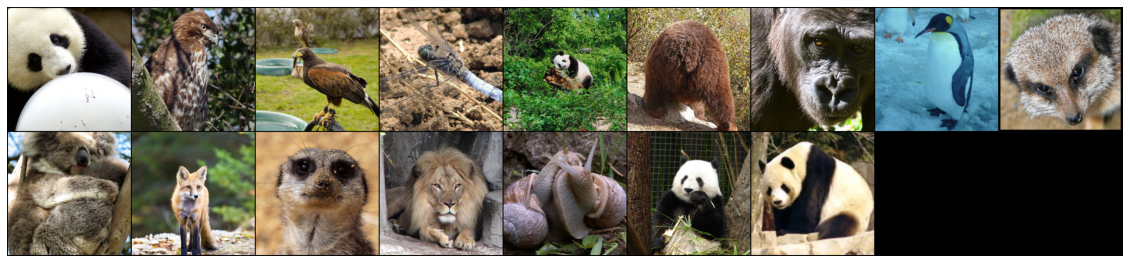

In [17]:
sample_inputs, _ = next(iter(loader_val))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20, 10))
plt.axis('off')
show(img)


Next, we define ResNet-18:

In [18]:
# define resnet building blocks

class ResidualBlock(nn.Module):
    def __init__(self, inchannel, outchannel, stride=1):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3,
                                         stride=stride, padding=1, bias=False),
                                  nn.BatchNorm2d(outchannel),
                                  nn.ReLU(inplace=True),
                                  Conv2d(outchannel, outchannel, kernel_size=3,
                                         stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(outchannel))

        self.shortcut = nn.Sequential()
        if stride != 1 or inchannel != outchannel:
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel,
                                                 kernel_size=1, stride=stride,
                                                 padding=0, bias=False),
                                          nn.BatchNorm2d(outchannel))

    def forward(self, x):
        out = self.left(x)
        out += self.shortcut(x)
        out = F.relu(out)
        return out


# define resnet

class ResNet(nn.Module):
    def __init__(self,
                 ResidualBlock,
                 channels_and_stride,
                 max_pool_size,
                 num_classes=20):
        super(ResNet, self).__init__()
        if math.prod([s for (_, s) in channels_and_stride]) * max_pool_size != 256:
            raise Exception("The final layer does not match what is needed")

        self.inchannel = 16
        # I stored all the layers in a module list to allow dynamic selection of
        # how many layers the model would have and of what size
        self.model_layers = nn.ModuleList()
        self.model_layers.append(
            nn.Sequential(Conv2d(3, 16, kernel_size=3, stride=1,
                                 padding=1, bias=False),
                          nn.BatchNorm2d(16),
                          nn.ReLU())
        )
        for (channel, stride) in channels_and_stride:
            self.model_layers.append(self.make_layer(
                ResidualBlock, channel, 2, stride=stride))

        self.maxpool = MaxPool2d(max_pool_size)
        self.fc = nn.Linear(channels_and_stride[-1][0], num_classes)

    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
        return nn.Sequential(*layers)

    def forward(self, x):
        for layer in self.model_layers:
            x = layer(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


def MyResNet(channels_and_stride, max_pool_size):
    return ResNet(ResidualBlock, channels_and_stride, max_pool_size)


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def confusion(preds, y):
    labels = ['African Elephant', 'Kingfisher', 'Deer', 'Brown Bear', 'Chameleon', 'Dragonfly',
              'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
              'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
    #  Plotting the confusion matrix
    cm = confusion_matrix(
        y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels, rotation=70)
    ax.yaxis.set_ticklabels(labels, rotation=0)
    plt.show()


def incorrect_preds(preds, y, test_img):
    labels = ['African Elephant', 'Kingfisher', 'Deer', 'Brown Bear', 'Chameleon', 'Dragonfly',
              'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
              'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
    # lets see a sample of the images which were classified incorrectly!
    correct = (preds == y).float()
    test_labels_check = correct.cpu().numpy()
    incorrect_indexes = np.where(test_labels_check == 0)

    test_img = test_img.cpu()
    samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                        padding=2, normalize=False, value_range=None,
                        scale_each=False, pad_value=0)
    plt.figure(figsize=(20, 10))
    plt.title('Incorrectly Classified Instances')
    show(samples)
    labels = np.asarray(labels)
    print('Predicted label',
          labels[preds[incorrect_indexes].cpu().numpy()[:9]])
    print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
    print('Corresponding images are shown below')


In [20]:
USE_GPU = True
dtype = torch.float32


if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)


def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set

    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
                stack_labels = y
                stack_predicts = preds
            elif analysis:
                stack_labels = torch.cat([stack_labels, y], 0)
                stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct of val set (%.2f)' %
              (num_correct, num_samples, 100 * acc))
        if analysis:
            print('check acc', type(stack_predicts), type(stack_labels))
            confusion(stack_predicts, stack_labels)
            incorrect_preds(preds, y, x)
        return float(acc)


def train_part(model, optimizer, epochs=1, batch_size=32, hparam_search=False):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.

    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for

    Returns: Nothing, but prints model accuracies during training.
    """

    loader_train = DataLoader(
        train_set, batch_size=batch_size, shuffle=True, num_workers=2)
    loader_val = DataLoader(val_set, batch_size=batch_size,
                            shuffle=True, num_workers=2)
    
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    train_start_time = time.time()
    loader_train_len = len(loader_train)
    total_index = epochs * loader_train_len
    for e in range(epochs):
        epoch_start_time = time.time()
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()
            if hparam_search:
                time_taken = time.time() - train_start_time
                index = e * loader_train_len + (t+1)
                printProgressBar(index, total_index,
                                 suffix=f"| Took {round(time_taken, 2)} seconds | Epoch {e + 1}/{epochs} | loss={round(loss.item(), 3)}\t")
            else:
                time_taken = time.time() - epoch_start_time
                printProgressBar(t + 1, len(loader_train),
                                 suffix=f"| Took {round(time_taken, 3)} seconds | loss={round(loss.item(), 3)} | epoch {e + 1}/{epochs}\t")
        
        if not hparam_search:
            check_accuracy(loader_val, model)
        


cuda:0


In [ ]:
# Hyperparameters
channels_and_stride = [(16, 2),(32, 2),(64, 2),(128, 2),(128, 1),(64, 2),(32, 2)]
max_pool_size = 4
epochs = 20
batch_size = 4


# define and train the network
model = MyResNet(channels_and_stride, max_pool_size)
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-7)

params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))

start = time.time()
train_part(model, optimizer, epochs=epochs, batch_size=batch_size)
time_taken = round(time.time() - start, 3)
print(f"Training took {time_taken} seconds overall")


# report test set accuracy
check_accuracy(loader_val, model, analysis=True)


# save the model
torch.save(model.state_dict(), 'model.pt')

# Oiginal: 715 / 1998 (35.79)
# Rise and fall channels, epochs=10: 816/1998 (40.84)


Total number of parameters is: 1533572


---

In [ ]:
from itertools import product

channels_and_stride_combinations = [
    [(16, 2),(32, 2),(64, 2),(128, 2),(128, 1),(64, 2),(32, 2)],
    [(16, 2),(32, 2),(64, 2),(128, 2),(64, 2),(32, 2)],
    [(16, 2),(32, 2),(64, 2),(64, 4),(32, 2)],
    [(16, 2),(32, 4),(64, 4),(32, 2)],
    [(16, 2),(32, 2),(64, 2),(128, 1),(256, 2), (128, 1),(64, 2),(32, 2)],
    [(16, 2),(32, 2),(64, 2),(128, 2),(64, 2),(32, 2),(16,1)]
]
optimizers = [
    ('Adamax', optim.Adamax),
    ('AdamW', optim.AdamW),
    ('RAdam', optim.RAdam)
]
max_pool_sizes = [4]
batch_sizes = [8, 16, 32, 64]
learning_rates = [0.0001]
weight_decays = [1e-7]
epochs = [10]



def hyperparameter_search(all_combinations):
    best_model = None
    best_model_accuracy = 0
    
    for i, (channels_and_stride, (optimizer_name, optimizer_func), max_pool_size, batch_size, lr, wd, epoch) in enumerate(all_combinations):
        print(f"Combination {i + 1} out of {len(list(all_combinations))}")

        loader_train = DataLoader(
            train_set, batch_size=batch_size, shuffle=True, num_workers=2)
        loader_val = DataLoader(val_set, batch_size=batch_size,
                                shuffle=True, num_workers=2)

        # define and train the network
        model = MyResNet(channels_and_stride, max_pool_size)
        optimizer = optimizer_func(model.parameters(), lr=lr, weight_decay=wd)

        print("Hyperparameters:")
        print(f"\tChannels and Strides: {channels_and_stride}")
        print(f"\tMax Pool Size: {max_pool_size}")
        print(f"\tOptimizer: {optimizer_name}")
        print(f"\tBatch Size: {batch_size}")
        print(f"\tLearning Rate: {lr}")
        print(f"\tWeight Decay: {wd}")
        print(f"\tRunning for {epoch} epochs")

        params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        print("Total number of parameters is: {}".format(params))

        start = time.time()
        train_part(model, optimizer, epochs=epoch, batch_size=batch_size, hparam_search=True)
        time_taken = round(time.time() - start, 3)
        print(f"Training took {time_taken} seconds overall")
        accuracy = check_accuracy(loader_val, model)
        if accuracy > best_model_accuracy:
            best_model = model
            best_model_accuracy = accuracy
            print("New best model found")
        print("")
    
    return best_model
        
    
all_combinations = list(product(channels_and_stride_combinations, optimizers, max_pool_sizes, batch_sizes, learning_rates, weight_decays, epochs))
best_model = hyperparameter_search(all_combinations)

torch.save(best_model.state_dict(), 'hparam_search_model.pt')

'''
Current Highest:
Hyperparameters:
	Channels and Strides: [(16, 2), (32, 2), (64, 2), (128, 2), (128, 1), (64, 2), (32, 2)]
	Max Pool Size: 4
	Optimizer: AdamW
	Batch Size: 8
	Learning Rate: 0.0001
	Weight Decay: 1e-07
	Running for 10 epochs
Total number of parameters is: 1533572
Training took 1077.324 seconds overall
Got 1341 / 1998 correct of val set (67.12)
New best model found

'''


Combination 1 out of 72
Hyperparameters:
	Channels and Strides: [(16, 2), (32, 2), (64, 2), (128, 2), (128, 1), (64, 2), (32, 2)]
	Max Pool Size: 4
	Optimizer: Adamax
	Batch Size: 8
	Learning Rate: 0.0001
	Weight Decay: 1e-07
	Running for 10 epochs
Total number of parameters is: 1533572
 |██████████████████████████████████████████████████| 100.0% | Took 1033.13 seconds | Epoch 10/10 | loss=0.67		
Training took 1033.219 seconds overall
Got 1082 / 1998 correct of val set (54.15)
New best model found

Combination 2 out of 72
Hyperparameters:
	Channels and Strides: [(16, 2), (32, 2), (64, 2), (128, 2), (128, 1), (64, 2), (32, 2)]
	Max Pool Size: 4
	Optimizer: Adamax
	Batch Size: 16
	Learning Rate: 0.0001
	Weight Decay: 1e-07
	Running for 10 epochs
Total number of parameters is: 1533572
 |██████████████████████████████████████████████████| 100.0% | Took 629.69 seconds | Epoch 10/10 | loss=1.058	
Training took 629.766 seconds overall
Got 842 / 1998 correct of val set (42.14)

Combination 3 o

<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)

Got 1277 / 2000 correct of val set (63.85)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


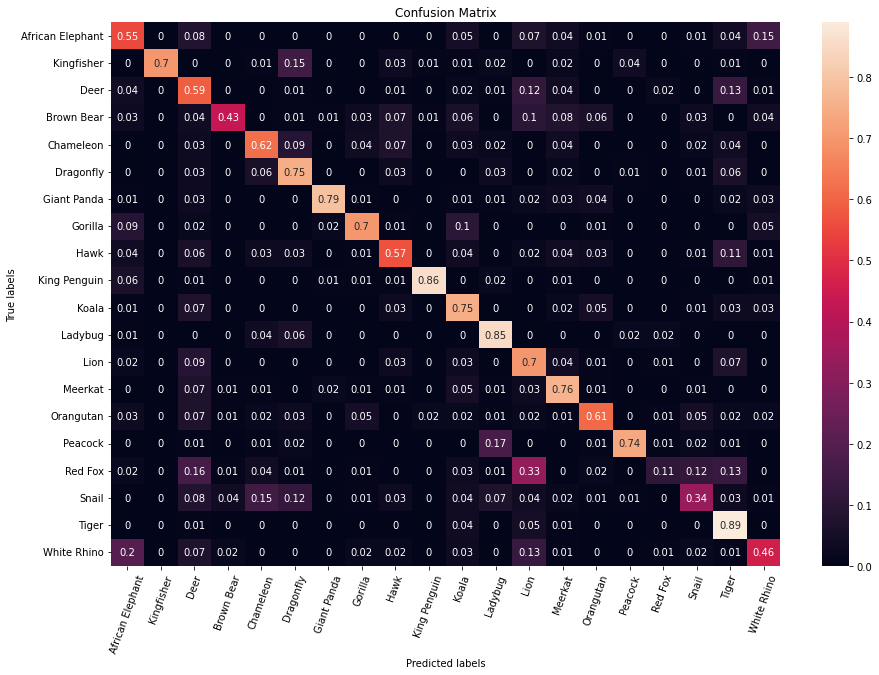

Predicted label ['Deer' 'Chameleon' 'Tiger' 'Deer' 'Chameleon']
True label ['Red Fox' 'Orangutan' 'Hawk' 'African Elephant' 'Snail']
Corresponding images are shown below


0.6385

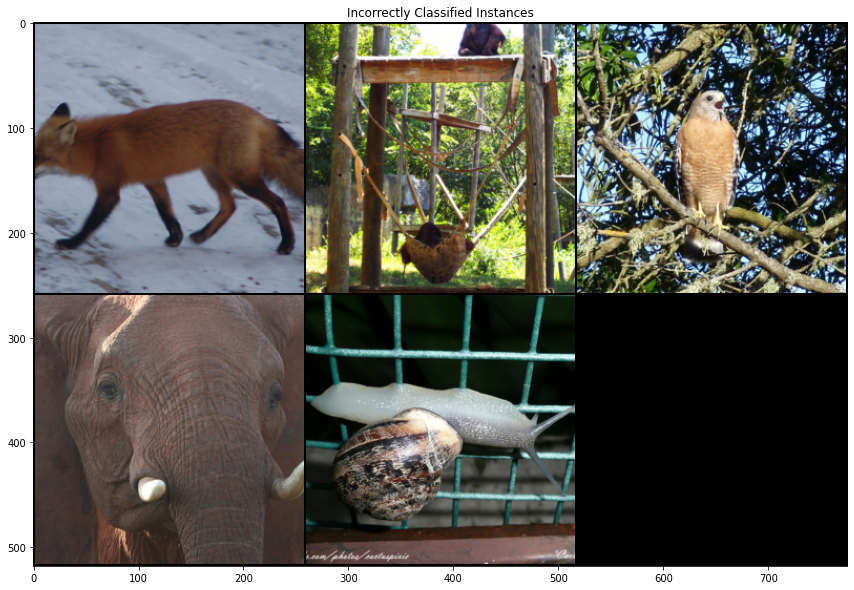

In [22]:
# Run once your have trained your final model
check_accuracy(loader_test, model, analysis=True)


___

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)

One method to find the best hyperparameters is to use a Genetic Algorithm. In this method, each memebr of the "population" would be a model with different hyperparameters. These hyperparameters could include the number of epochs, the number of layers and how many channels each has, the stride in each layer, the batch size of training, validation and testing, the optimizer (along with the learning rate and weight decay rate) to name a few. 

Each member would start out with a random value for each of these parameters (within a range of feasible parameters so as to not waste computation time on infeasible parameters). Once every model has finished training (one generation) we would compare them all on the same test data to see the final score - how well each memebr of the population has performed. Those with the higest score would "breed" with other models. To achieve this, the best models would be paired up, then genes (hyperparameters) from each parent would be mixed to create a new model which encompasses characteristics from both parents. To make sure that the population does not become stale, random mutations would also occur to randomly change some parameters by a small amount. 

Finally, to make sure the best performing model is never worse than the previous generation (as to not "devolve"), a handful of the best models would be copied directly into the new generation. This new generation would begin training just as the previous had. This would continue until a certain criteria had been met, such as the number of generations has reached a maximum or a certain minimum score has been met. 

This is an efficient method of searching for the best parameters, however, this is also one of the more difficult methods of training as it requires a lot more code than a simple grid search or random search approach. Moreover, training potentially hundreds of models would require a lot of computational power, potentially more than if you had done an exhaustive search over a grid of potential values. However, this does allow the algorithm to be more confident in having found the best model as it is not contrained to hard-coded values.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions 

Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)

Although creating a genetic algorithm would have most likely resulted in the best model being found, this would have been a lengthy task. Therefore, taking in mind the time and resources I had to find a better model, I instead opted for a grid search method. I randomly tested different models to see what kind of changes made different improvements. Then I collected this data into a series of potential values for a model. After I had assembled a grid of potential values each parameter could take, I took the cartesian product of all these parameters to find every combination possible. These then proceeded to all run to find which model performed the best. At the end, I selected the model which achieved the best score on the validation set to be my final model. The parameters of this model were:

* something
* soemthing

---

<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions*(: 

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

What are the other possible ways to analyse the performance of your network? (2 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture). 

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [21]:
import matplotlib.pyplot as plt


def plot_model_features():
    fig = plt.tight_layout()
    activation = {}

    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    layer_label = 'model_layers'
    layers = getattr(model, layer_label)

    for i, layer in enumerate(layers):
        layer.register_forward_hook(get_activation(f"layer_{i}"))

    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device=device, dtype=dtype)
    output = model(data)

    for i in range(len(layers)):
        layer_name = f"layer_{i}"
        act = activation[layer_name].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2

        fig, axarr = plt.subplots(nrows, ncols, figsize=(15, 5))
        fig.suptitle(layer_name)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1


<!-- BEGIN QUESTION -->



<Figure size 432x288 with 0 Axes>

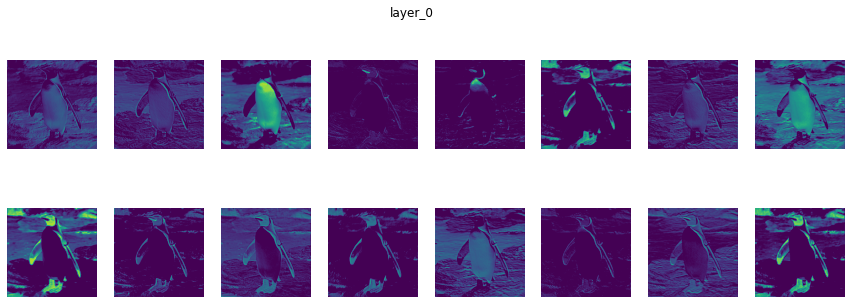

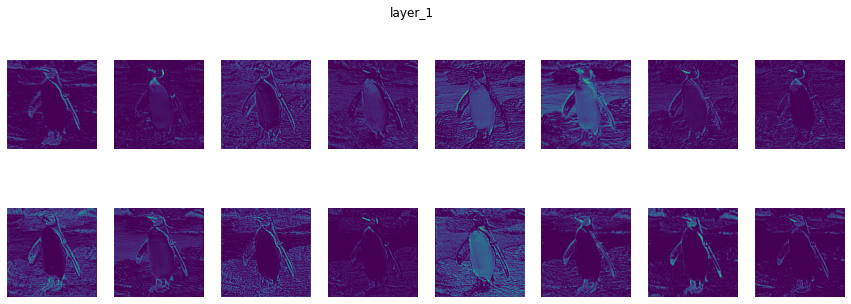

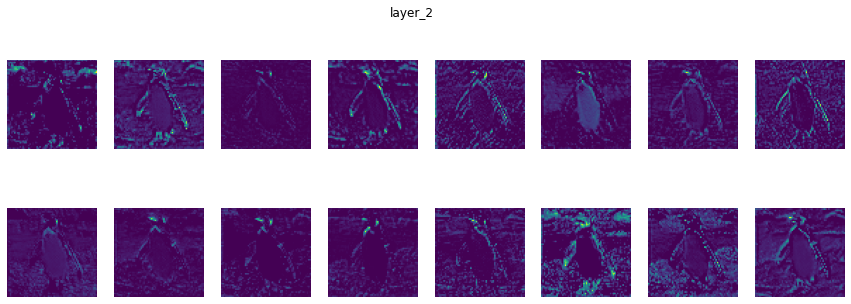

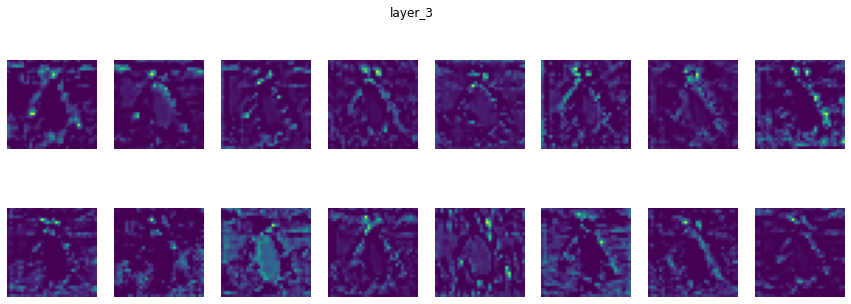

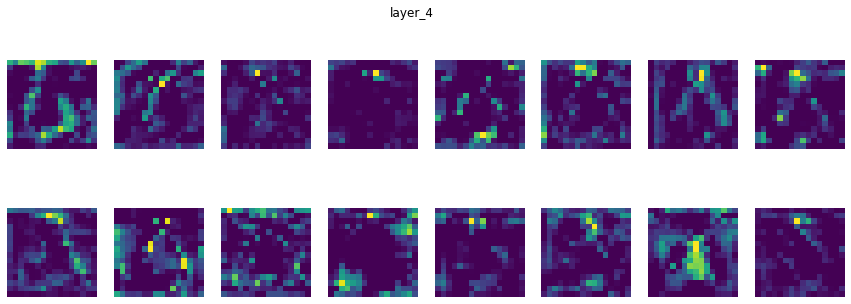

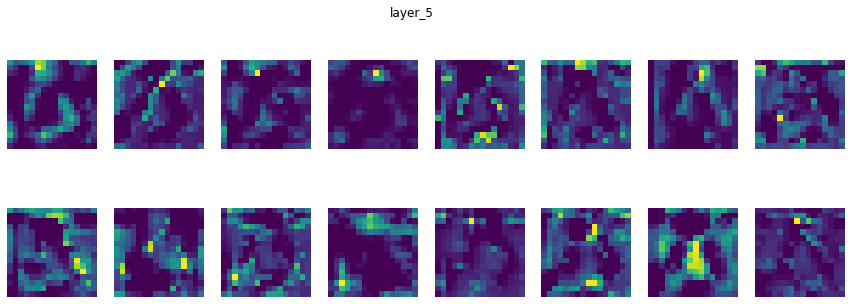

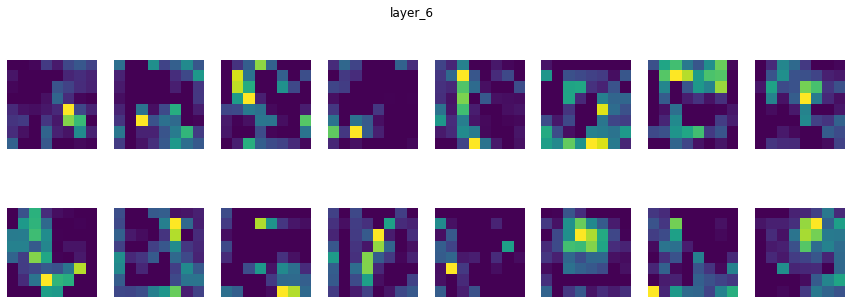

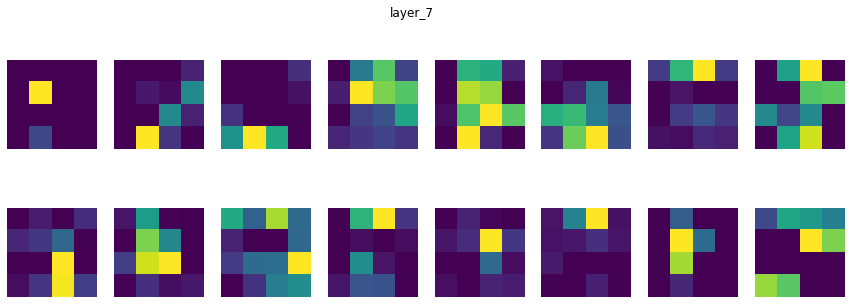

In [26]:
# Visualize the figure here, so it is exported nicely
plot_model_features()


<!-- END QUESTION -->

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)

---

To double-check your work, the cell below will rerun all of the autograder tests.